In [1]:
##Libraries
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.io as spio
import scipy.sparse.linalg as ll
import os
import pandas as pd
import sklearn
from numpy.linalg import norm
from scipy.io import loadmat
%matplotlib inline

from skimage.transform import rescale, resize, downscale_local_mean
import skimage
from sklearn.decomposition import PCA
import networkx as nx
from networkx.convert_matrix import from_numpy_matrix
from sklearn.utils import graph_shortest_path
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import plotly.express as px

In [2]:
## Path directory
dirpath = os.getcwd()
folder = dirpath+"\\Data\\"
folder_s1 = dirpath+"\\Data\\yalefaces_s1\\"
folder_s2 = dirpath+"\\Data\\yalefaces_s2\\"
folder_s = dirpath+"\\Data\\yalefaces\\"

subject01.glasses.gif
(4880,) 
---------------------



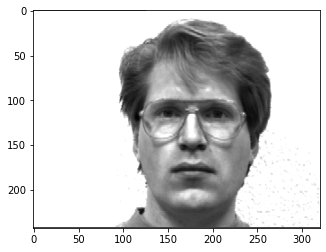

subject01.happy.gif
(4880,) 
---------------------



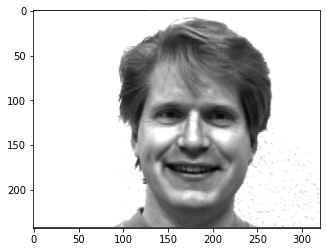

subject01.leftlight.gif
(4880,) 
---------------------



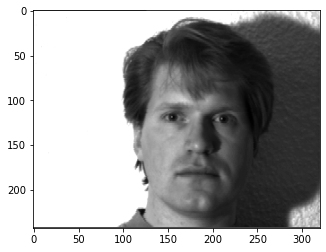

subject01.noglasses.gif
(4880,) 
---------------------



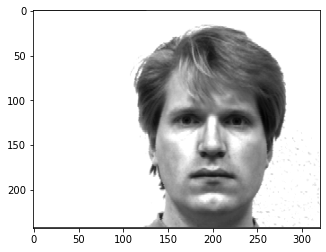

subject01.normal.gif
(4880,) 
---------------------



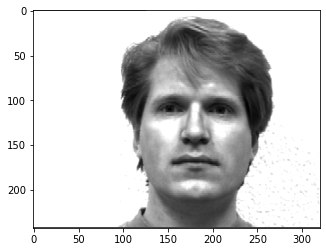

subject01.rightlight.gif
(4880,) 
---------------------



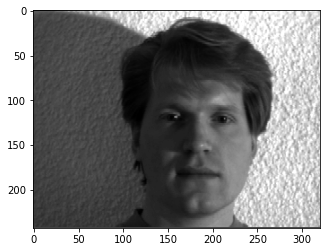

subject01.sad.gif
(4880,) 
---------------------



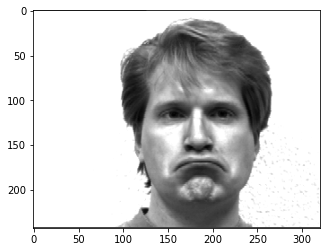

subject01.sleepy.gif
(4880,) 
---------------------



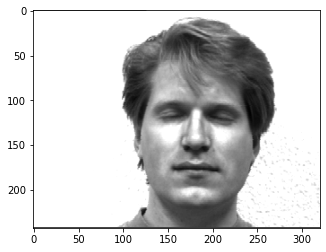

subject01.surprised.gif
(4880,) 
---------------------



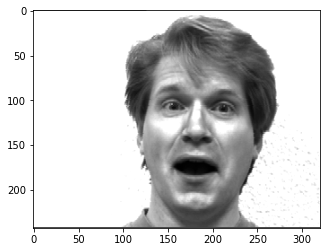

subject01.wink.gif
(4880,) 
---------------------



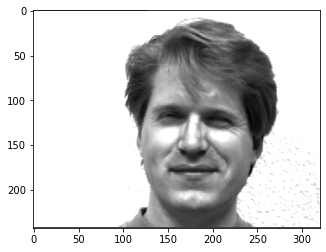

(10, 4880) 
---------------------



In [3]:
## Read training images for subject-1, downsample and bind them into a single matrix with each row representing an image
img_vector_s1 = np.array([])
k = 0
for filename in os.listdir(folder_s1):
    
    img = plt.imread(os.path.join(folder_s1,filename))
    print(filename)
    img_scaled = resize(img, (61, 80))
    img_vector = np.reshape(img_scaled, (img_scaled.shape[0] * img_scaled.shape[1]))
    print(img_vector.shape,'\n---------------------\n')
    if(k==0):
        k=1
        img_vector_s1 = img_vector
    else:
        img_vector_s1 = np.vstack((img_vector_s1,img_vector))


    plt.imshow(img,cmap=plt.get_cmap('gray'))
    plt.pause(0.1)
print(img_vector_s1.shape,'\n---------------------\n')
                


In [4]:
##PCA on subject-1, with top 6 components
pca_s1 = PCA(6)
pca_s1.fit(img_vector_s1)


PCA(n_components=6)

Subject 1, eigen face: 1


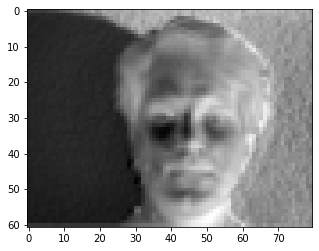


---------------------------------------
Subject 1, eigen face: 2


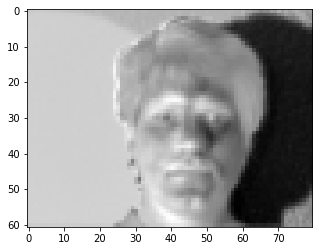


---------------------------------------
Subject 1, eigen face: 3


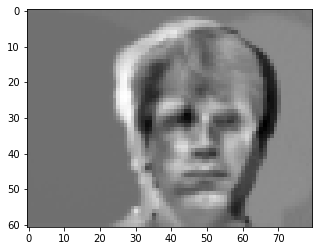


---------------------------------------
Subject 1, eigen face: 4


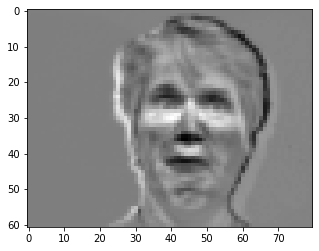


---------------------------------------
Subject 1, eigen face: 5


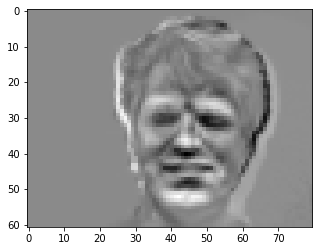


---------------------------------------
Subject 1, eigen face: 6


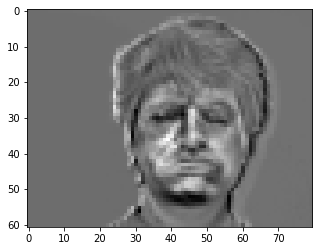


---------------------------------------


In [5]:
## Top six eigen faces for subject-1
for i in range(0,6):
    print('Subject 1, eigen face:',i+1)
    plt.imshow(pca_s1.components_[i,:].reshape(61,80),cmap=plt.get_cmap('gray'))
    plt.show()
    print('\n---------------------------------------')

subject02.glasses.gif
(4880,) 
---------------------



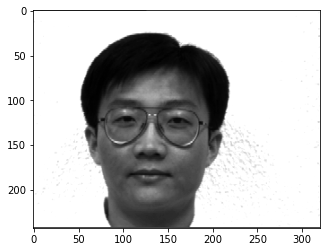

subject02.happy.gif
(4880,) 
---------------------



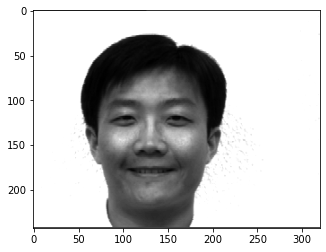

subject02.leftlight.gif
(4880,) 
---------------------



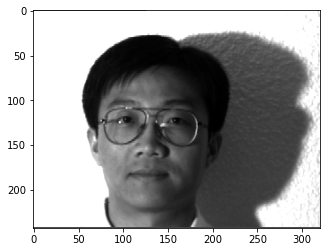

subject02.noglasses.gif
(4880,) 
---------------------



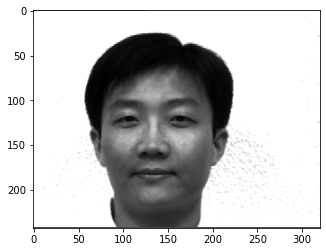

subject02.normal.gif
(4880,) 
---------------------



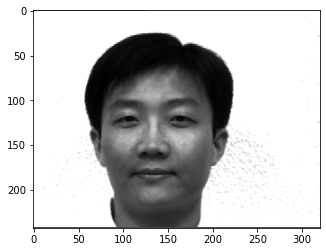

subject02.rightlight.gif
(4880,) 
---------------------



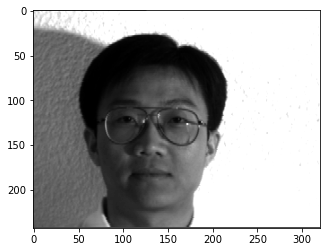

subject02.sad.gif
(4880,) 
---------------------



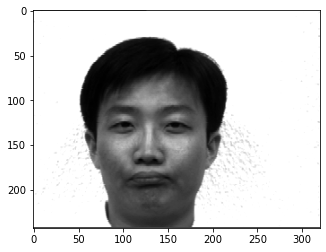

subject02.sleepy.gif
(4880,) 
---------------------



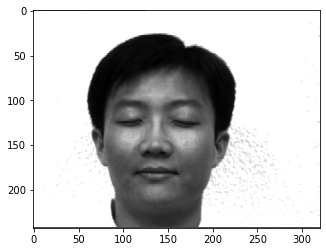

subject02.wink.gif
(4880,) 
---------------------



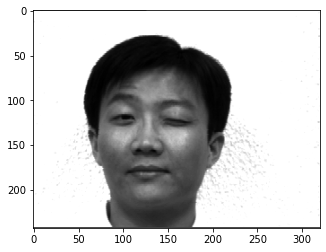

(9, 4880) 
---------------------



In [6]:
## Read training images for subject-2, downsample and bind them into a single matrix with each row representing an image

img_vector_s2 = np.array([])
k = 0
for filename in os.listdir(folder_s2):
    
    img1 = plt.imread(os.path.join(folder_s2,filename))
    print(filename)
    img_scaled1 = resize(img1, (61, 80))
    img_vector1 = np.reshape(img_scaled1, (img_scaled1.shape[0] * img_scaled1.shape[1]))
    print(img_vector1.shape,'\n---------------------\n')
    if(k==0):
        k=1
        img_vector_s2 = img_vector1
    else:
        img_vector_s2 = np.vstack((img_vector_s2,img_vector1))


    plt.imshow(img1,cmap=plt.get_cmap('gray'))
    plt.pause(0.1)
print(img_vector_s2.shape,'\n---------------------\n')
                


In [7]:
##PCA on subject-2, with top 6 components
pca_s2 = PCA(6)
pca_s2.fit(img_vector_s2)


PCA(n_components=6)

Subject 2, eigen face: 1


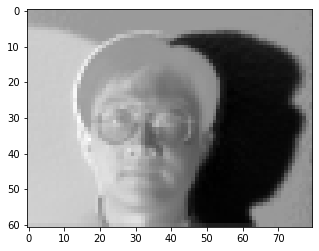


---------------------------------------
Subject 2, eigen face: 2


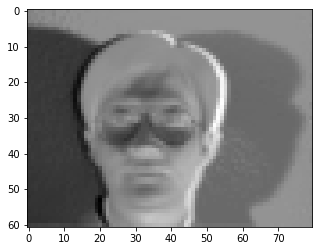


---------------------------------------
Subject 2, eigen face: 3


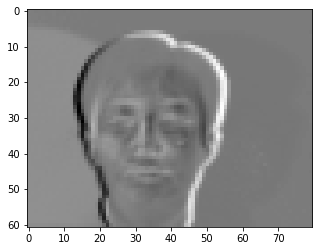


---------------------------------------
Subject 2, eigen face: 4


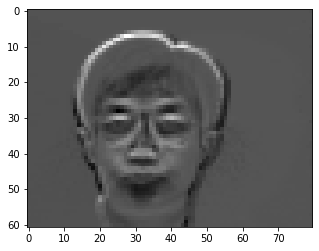


---------------------------------------
Subject 2, eigen face: 5


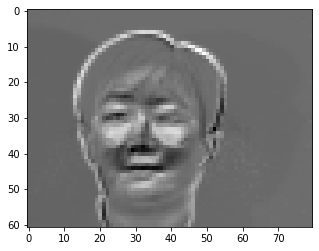


---------------------------------------
Subject 2, eigen face: 6


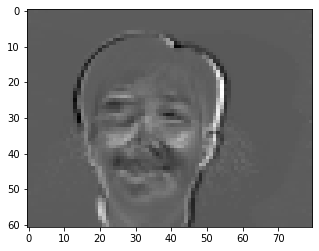


---------------------------------------


In [8]:
## Top six eigen faces for subject-2
for i in range(0,6):
    print('Subject 2, eigen face:',i+1)
    plt.imshow(pca_s2.components_[i,:].reshape(61,80),cmap=plt.get_cmap('gray'))
    plt.show()
    print('\n---------------------------------------')

In [9]:
##Extracting top eigen faces for each subject
s1_p1 = pca_s1.components_[0:1,:][0]
s2_p1 = pca_s2.components_[0:1,:][0]


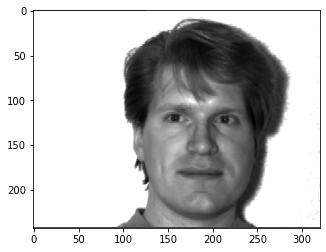

In [10]:
##Test image subject-1
s1_test = plt.imread(folder_s+'subject01-test.gif')
plt.imshow(s1_test,cmap=plt.get_cmap('gray'))
plt.show()

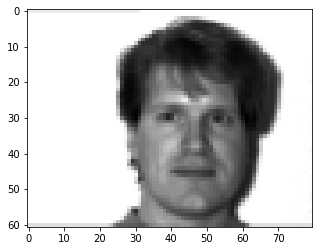

In [11]:
##Preprocessing test image
s1_test_scaled = resize(s1_test, (61, 80))
s1_test_vector = np.reshape(s1_test_scaled, (s1_test_scaled.shape[0] * s1_test_scaled.shape[1]))
plt.imshow(s1_test_scaled,cmap=plt.get_cmap('gray'))
plt.show()

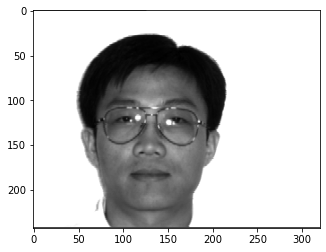

In [12]:
##Test image subject 2
s2_test = plt.imread(folder_s+'subject02-test.gif')
plt.imshow(s2_test,cmap=plt.get_cmap('gray'))
plt.show()

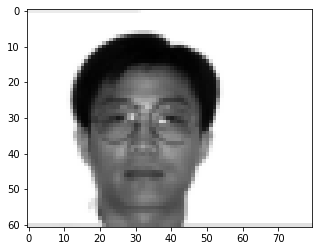

In [13]:
##Preprocessing test image
s2_test_scaled = downscale_local_mean(s2_test, (4, 4))
s2_test_scaled = resize(s2_test, (61, 80))
s2_test_vector = np.reshape(s2_test_scaled, (s2_test_scaled.shape[0] * s2_test_scaled.shape[1]))
plt.imshow(s2_test_scaled,cmap=plt.get_cmap('gray'))
plt.show()

In [14]:
##Calculating projection residuals
print('s11:',norm(s1_test_vector - np.dot(s1_p1,np.dot(s1_p1.T,s1_test_vector))))
print('s12:',norm(s2_test_vector - np.dot(s1_p1,np.dot(s1_p1.T,s2_test_vector))))

print('\n')
print('s21:',norm(s1_test_vector - np.dot(s2_p1,np.dot(s2_p1.T,s1_test_vector))))
print('s22:',norm(s2_test_vector - np.dot(s2_p1,np.dot(s2_p1.T,s2_test_vector))))


s11: 26.40004704173462
s12: 41.02340478551357


s21: 54.98590435381447
s22: 52.16090999016135


In [15]:
## load datafile
images = loadmat(folder+'isomap.mat')['images']


In [16]:
## Transform data for each row representing an image
input_images = images.T
dims = 2 ##Number of PCA components

##for visualization
df = pd.DataFrame(input_images)
pixels_per_dimension = int(math.sqrt(4096))

In [17]:
##High runtime hence commenting the block of code.
##I've saved the required distance matrix using Eucledian distance 


# Adj_matrix =  np.empty([len(input_images),len(input_images)])
# for i in range(0,len(input_images)):
#     for j in range(0,len(input_images)):
#         Adj_matrix[i,j]=  np.power(sum(np.power((input_images[i]-input_images[j]),2)),0.5)
# pd.DataFrame(Adj_matrix).to_csv(folder+'EuclideanDistances_iso.csv', index=False)

In [18]:
##High runtime hence commenting the block of code.
##I've saved the required distance matrix using Manhattan distance


# Adj_matrix =  np.empty([len(input_images),len(input_images)])
# for i in range(0,len(input_images)):
#     for j in range(0,len(input_images)):
#         Adj_matrix[i,j]=  sum(abs(input_images[i]-input_images[j]))

# pd.DataFrame(Adj_matrix).to_csv(folder+'ManhattanDistances_iso.csv', index=False)

In [19]:
##Read Eulidean distance based Nearest Neighbour file
Distance_Euclidean = pd.read_csv(folder+'EuclideanDistances_iso.csv')
Distance_Euclidean = np.array(Distance_Euclidean)

In [20]:
##Adjusting threshold value for E to create Adjacency matrix
E=12

Adj_matrix_euclidean = Distance_Euclidean.copy()
Adj_matrix_euclidean[Adj_matrix_euclidean > E] = 0
pd.DataFrame(Adj_matrix_euclidean).loc[range(0,10),range(0,10)]

0          1        2         3    4    5         6    7          8  \
0  0.00000   0.000000  6.74324  0.000000  0.0  0.0  0.000000  0.0   0.000000   
1  0.00000   0.000000  0.00000  0.000000  0.0  0.0  0.000000  0.0  11.889321   
2  6.74324   0.000000  0.00000  0.000000  0.0  0.0  0.000000  0.0   0.000000   
3  0.00000   0.000000  0.00000  0.000000  0.0  0.0  5.726981  0.0   0.000000   
4  0.00000   0.000000  0.00000  0.000000  0.0  0.0  0.000000  0.0   0.000000   
5  0.00000   0.000000  0.00000  0.000000  0.0  0.0  0.000000  0.0   0.000000   
6  0.00000   0.000000  0.00000  5.726981  0.0  0.0  0.000000  0.0   0.000000   
7  0.00000   0.000000  0.00000  0.000000  0.0  0.0  0.000000  0.0   0.000000   
8  0.00000  11.889321  0.00000  0.000000  0.0  0.0  0.000000  0.0   0.000000   
9  0.00000   0.000000  0.00000  0.000000  0.0  0.0  0.000000  0.0   0.000000   

     9  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0  
5  0.0  
6  0.0  
7  0.0  
8  0.0  
9  0.0

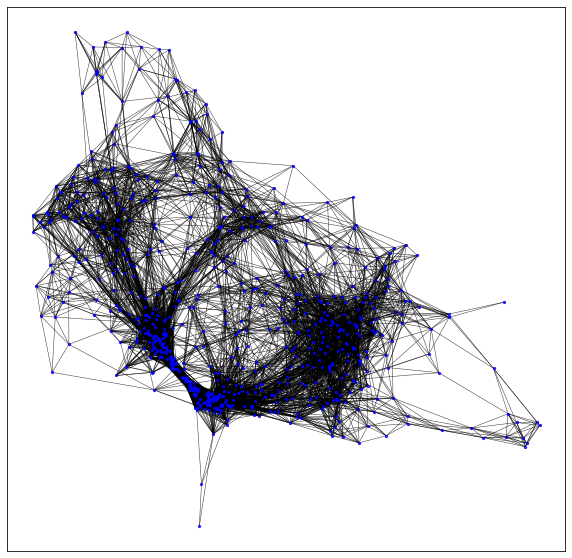

In [21]:
##Visualize nearest neighbours
G = from_numpy_matrix(Adj_matrix_euclidean, parallel_edges=False, create_using=None)
plt.figure(figsize=(10,10)) 
nx.draw_networkx(G, node_size=5, width=0.5, with_labels=False, alpha=0.8, node_color ='blue',edge_color='black')

plt.show()

In [22]:
##Isomap computation
Adj_matrix = Adj_matrix_euclidean
one_matrix = np.full((Adj_matrix.shape[1], Adj_matrix.shape[1]), 1)
one_matrix = one_matrix/Adj_matrix.shape[1]

Identity_matrix =  np.diag(np.repeat(1,Adj_matrix.shape[1]) )
H = Identity_matrix- one_matrix
H= np.subtract(Identity_matrix,one_matrix)

D_matrix_eucledian = graph_shortest_path.graph_shortest_path(Adj_matrix_euclidean)

D = D_matrix_eucledian
D_square =  np.power(D,2)
C = 0.5*np.dot(np.dot(H,D_square),H)

In [23]:
#Eigen value and eigen vectors
eig_vec_c, eig_val_c, _ = np.linalg.svd(C)

#Picking eigen vectors corresponding to top two values
inds = (-eig_val_c).argsort()
eig_val_c = eig_val_c[inds]
eig_vec_c = eig_vec_c[:,inds]
  
#creating the w and z matrix with dims = 2
w = eig_vec_c[:,range(0,dims)]
lambda_vals = eig_val_c[range(0,dims)]
w_lambda = w * np.power((lambda_vals),0.5)

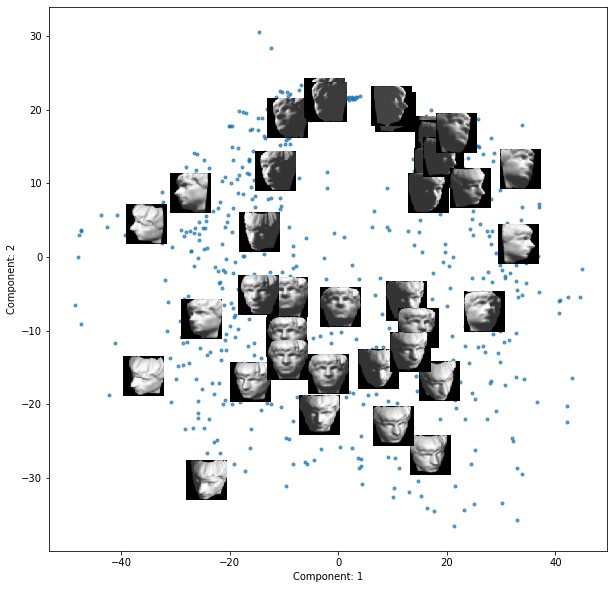

In [24]:
## Result visualization
manifold_2D = pd.DataFrame( w_lambda[:,(0,1)])
manifold_2D.columns = ['Component 1','Component 2']

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

# Show 40 of the images ont the plot
x_size = (max(manifold_2D['Component 1']) - min(manifold_2D['Component 1'])) * 0.08
y_size = (max(manifold_2D['Component 2']) - min(manifold_2D['Component 2'])) * 0.08
for i in range(40):
    img_num = np.random.randint(0, 698)
    x0 = manifold_2D.loc[img_num, 'Component 1'] - (x_size / 2.)
    y0 = manifold_2D.loc[img_num, 'Component 2'] - (y_size / 2.)
    x1 = manifold_2D.loc[img_num, 'Component 1'] + (x_size / 2.)
    y1 = manifold_2D.loc[img_num, 'Component 2'] + (y_size / 2.)
    img = df.iloc[img_num,:].values.reshape(pixels_per_dimension, pixels_per_dimension,order="F")
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, 
              interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

# Show 2D components plot
ax.scatter(manifold_2D['Component 1'], manifold_2D['Component 2'], marker='.',alpha=0.7)

plt.show()

In [25]:
##Manhattan implementation

##Manhattan distance based nearest neighbours
Distance_Manhattan= pd.read_csv(folder+'ManhattanDistances_iso.csv')
Distance_Manhattan= np.array(Distance_Manhattan)


In [26]:
##Adjusting threshold value for E to create Adjacency matrix
E=500

Adj_matrix_manhattan = Distance_Manhattan.copy()
Adj_matrix_manhattan[Adj_matrix_manhattan > E] = 0

In [27]:
##Isomap computation
Adj_matrix = Adj_matrix_manhattan
one_matrix = np.full((Adj_matrix.shape[1], Adj_matrix.shape[1]), 1)
one_matrix = one_matrix/Adj_matrix.shape[1]

Identity_matrix =  np.diag(np.repeat(1,Adj_matrix.shape[1]) )
H = Identity_matrix- one_matrix
H= np.subtract(Identity_matrix,one_matrix)

D_matrix_manhattan = graph_shortest_path.graph_shortest_path(Adj_matrix_manhattan)

D = D_matrix_manhattan
D_square =  np.power(D,2)
C = 0.5*np.dot(np.dot(H,D_square),H)

In [28]:
#Eigen value and eigen vectors
eig_vec_c, eig_val_c, _ = np.linalg.svd(C)

#Picking eigen vectors corresponding to top two values
inds = (-eig_val_c).argsort()
eig_val_c = eig_val_c[inds]
eig_vec_c = eig_vec_c[:,inds]
  
#creating the w and z matrix with dims = 2
w = eig_vec_c[:,range(0,dims)]
lambda_vals = eig_val_c[range(0,dims)]
w_lambda = w * np.power((lambda_vals),0.5)

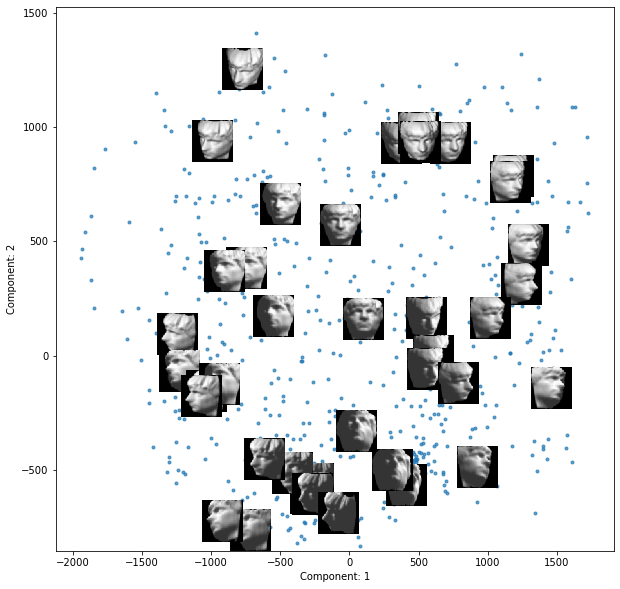

In [29]:
## Result visualization
manifold_2D = pd.DataFrame( w_lambda[:,(0,1)])
manifold_2D.columns = ['Component 1','Component 2']

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

# Show 40 of the images ont the plot
x_size = (max(manifold_2D['Component 1']) - min(manifold_2D['Component 1'])) * 0.08
y_size = (max(manifold_2D['Component 2']) - min(manifold_2D['Component 2'])) * 0.08
for i in range(40):
    img_num = np.random.randint(0, 698)
    x0 = manifold_2D.loc[img_num, 'Component 1'] - (x_size / 2.)
    y0 = manifold_2D.loc[img_num, 'Component 2'] - (y_size / 2.)
    x1 = manifold_2D.loc[img_num, 'Component 1'] + (x_size / 2.)
    y1 = manifold_2D.loc[img_num, 'Component 2'] + (y_size / 2.)
    img = df.iloc[img_num,:].values.reshape(pixels_per_dimension, pixels_per_dimension,order="F")
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, 
              interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

# Show 2D components plot
ax.scatter(manifold_2D['Component 1'], manifold_2D['Component 2'], marker='.',alpha=0.7)

plt.show()

In [30]:
##PCA implementation

##Load data
images = loadmat(folder+'isomap.mat')['images']
input_images = images.T
k = 2


In [31]:
##PCA computation
f1 = input_images
M = np.mean(f1, axis=0) ##Mean vector
print(M.shape)

C = f1 - M

V = np.cov(C.T)

##Eigen value decomposition
S, W = ll.eigs(V,k)
S = S.real
W = W.real
P = W.T.dot(C.T)

P = P.T

(4096,)


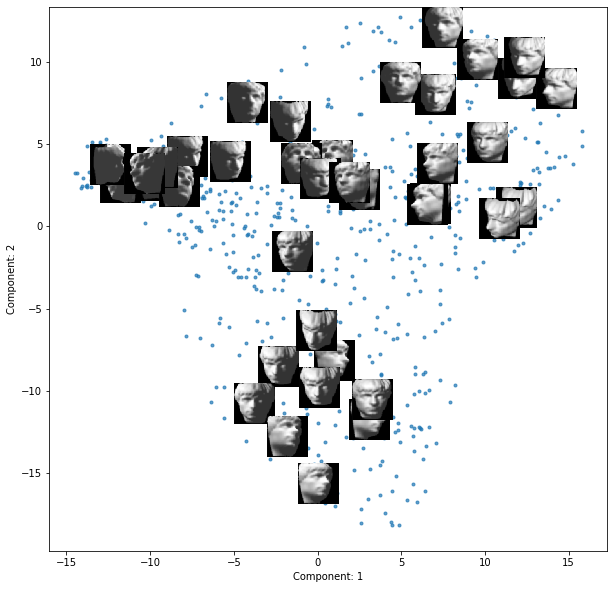

In [32]:
## Result visualization
manifold_2D = pd.DataFrame(P)
manifold_2D.columns = ['Component 1','Component 2']

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

# Show 40 of the images ont the plot
x_size = (max(manifold_2D['Component 1']) - min(manifold_2D['Component 1'])) * 0.08
y_size = (max(manifold_2D['Component 2']) - min(manifold_2D['Component 2'])) * 0.08
for i in range(40):
    img_num = np.random.randint(0, 698)
    x0 = manifold_2D.loc[img_num, 'Component 1'] - (x_size / 2.)
    y0 = manifold_2D.loc[img_num, 'Component 2'] - (y_size / 2.)
    x1 = manifold_2D.loc[img_num, 'Component 1'] + (x_size / 2.)
    y1 = manifold_2D.loc[img_num, 'Component 2'] + (y_size / 2.)
    img = df.iloc[img_num,:].values.reshape(pixels_per_dimension, pixels_per_dimension,order="F")
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, 
              interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

# Show 2D components plot
ax.scatter(manifold_2D['Component 1'], manifold_2D['Component 2'], marker='.',alpha=0.7)

plt.show()

In [33]:
FoodConsumption = pd.read_csv(folder+'food-consumption.csv')
FoodConsumption.head()

Country  Real coffee  Instant coffee  Tea  Sweetener  Biscuits  \
0  Germany           90              49   88         19        57   
1    Italy           82              10   60          2        55   
2   France           88              42   63          4        76   
3  Holland           96              62   98         32        62   
4  Belgium           94              38   48         11        74   

   Powder soup  Tin soup  Potatoes  Frozen fish  ...  Apples  Oranges  \
0           51        19        21           27  ...      81       75   
1           41         3         2            4  ...      67       71   
2           53        11        23           11  ...      87       84   
3           67        43         7           14  ...      83       89   
4           37        23         9           13  ...      76       76   

   Tinned fruit  Jam  Garlic  Butter  Margarine  Olive oil  Yoghurt  \
0            44   71      22      91         85         74       30   
1             9   46      80      66         24         94        5   
2            40   45      88      94         47         36       57   
3            61   81      15      31         97         13       53   
4            42   57      29      84         80         83       20   

   Crisp bread  
0           26  
1           18  
2            3  
3           15  
4            5  

[5 rows x 21 columns]

In [34]:
##Implementation with countries in rows
f1 = FoodConsumption.copy()
f1.drop('Country',inplace=True,axis=1)
f1.head()

Real coffee  Instant coffee  Tea  Sweetener  Biscuits  Powder soup  \
0           90              49   88         19        57           51   
1           82              10   60          2        55           41   
2           88              42   63          4        76           53   
3           96              62   98         32        62           67   
4           94              38   48         11        74           37   

   Tin soup  Potatoes  Frozen fish  Frozen veggies  Apples  Oranges  \
0        19        21           27              21      81       75   
1         3         2            4               2      67       71   
2        11        23           11               5      87       84   
3        43         7           14              14      83       89   
4        23         9           13              12      76       76   

   Tinned fruit  Jam  Garlic  Butter  Margarine  Olive oil  Yoghurt  \
0            44   71      22      91         85         74       30   
1             9   46      80      66         24         94        5   
2            40   45      88      94         47         36       57   
3            61   81      15      31         97         13       53   
4            42   57      29      84         80         83       20   

   Crisp bread  
0           26  
1           18  
2            3  
3           15  
4            5

In [35]:
##PCA computation
M = np.mean(f1, axis=0)
M.shape

C = f1 - M
V = np.cov(C.T)

##Eigen value decomposition
S, W = ll.eigs(V,k = 2)
S = S.real
W = W.real
P = W.T.dot(C.T)

P = P.T

In [36]:
##Visualizing results
f3 = pd.DataFrame(P)
f3.columns=['PC1','PC2']
f3.index = FoodConsumption['Country']

fig = px.scatter(f3, x = "PC1",y="PC2",
                 text = f3.index,
                 color=f3.index)
fig.update_traces(textposition='top center')
fig.show()

In [37]:
##Implementation with food items in rows
g1 = f1.copy()
g1 = g1.T
g1.columns = FoodConsumption['Country']
g1.head()

Country         Germany  Italy  France  Holland  Belgium  Luxembourg  England  \
Real coffee          90     82      88       96       94          97       27   
Instant coffee       49     10      42       62       38          61       86   
Tea                  88     60      63       98       48          86       99   
Sweetener            19      2       4       32       11          28       22   
Biscuits             57     55      76       62       74          79       91   

Country         Portugal  Austria  Switzerland  Sweden  Denmark  Norway  \
Real coffee           72       55           73      97       96      92   
Instant coffee        26       31           72      13       17      17   
Tea                   77       61           85      93       92      83   
Sweetener              2       15           25      31       35      13   
Biscuits              22       29           31      61       66      62   

Country         Finland  Spain  Ireland  
Real coffee          98     70       30  
Instant coffee       12     40       52  
Tea                  84     40       99  
Sweetener            20     18       11  
Biscuits             64     62       80

In [38]:
##PCA computation
M = np.mean(g1, axis=0)
M.shape

C = g1 - M
V = np.cov(C.T)

##Eigen value decomposition
S, W = ll.eigs(V,k = 2)
S = S.real
W = W.real
P = W.T.dot(C.T)

P = P.T

In [39]:
##Visualizing results
g3 = pd.DataFrame(P)
g3.columns=['PC1','PC2']
g3.index = g1.index

fig = px.scatter(g3, x = "PC1",y="PC2", text = g3.index,
      color=g3.index)
fig.update_traces(textposition='top center')
fig.show()

In [40]:
##End